##### Copyright 2018 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [ ]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# Basic classification: Classify images of clothing

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/keras/classification"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

本指南訓練神經網絡模型對服裝圖像進行分類，例如運動鞋和襯衫。如果您不了解所有細節也沒關係；這是一個完整的 TensorFlow 程序的快節奏概述，並在您進行時解釋了詳細信息。

本指南使用 [tf.keras](https://www.tensorflow.org/guide/keras)，這是一個在 TensorFlow 中構建和訓練模型的高級 API。

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.9.1


## 導入 Fashion MNIST 數據集

本指南使用 [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) 數據集，其中包含 10 個類別的 70,000 張灰度圖像。這些圖像顯示了低分辨率（28 x 28 像素）的單件服裝，如下所示：

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST 旨在替代經典的 [MNIST](http://yann.lecun.com/exdb/mnist/) 數據集——通常用作計算機視覺機器學習程序的“Hello, World” . MNIST 數據集包含格式與您將在此處使用的服裝相同的手寫數字（0、1、2 等）圖像。
本指南將 Fashion MNIST 用於多樣性，因為它比常規 MNIST 更具挑戰性。這兩個數據集都相對較小，用於驗證算法是否按預期工作。它們是測試和調試代碼的良好起點。
在這裡，60,000 張圖像用於訓練網絡，10,000 張圖像用於評估網絡學習圖像分類的準確度。您可以直接從 TensorFlow 訪問 Fashion MNIST。直接從 TensorFlow 導入並[加載 Fashion MNIST 數據](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data)：

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

加載數據集會返回四個 NumPy 數組：

*`train_images` 和 `train_labels` 數組是*訓練集*——模型用來學習的數據。
*該模型針對 *test set*、`test_images` 和 `test_labels` 數組進行了測試。

這些圖像是 28x28 NumPy 數組，像素值範圍從 0 到 255。*labels*是一個整數數組，範圍從 0 到 9。它們對應於圖像所代表的 *class*服裝：

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

每個圖像都映射到一個標籤。由於*類名稱*不包含在數據集中，因此將它們存儲在這里以供以後繪製圖像時使用：

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## 探索數據

讓我們在訓練模型之前探索數據集的格式。下圖顯示了訓練集中有 60,000 張圖像，每張圖像表示為 28 x 28 像素：

In [4]:
train_images.shape

(60000, 28, 28)

同樣，訓練集中有 60,000 個標籤：

In [5]:
len(train_labels)

60000

每個標籤都是 0 到 9 之間的整數：


In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

測試集中有 10,000 張圖像。同樣，每個圖像都表示為 28 x 28 像素：

In [7]:
test_images.shape

(10000, 28, 28)

測試集包含 10,000 個圖像標籤：

In [8]:
len(test_labels)

10000

## 預處理數據

在訓練網絡之前必須對數據進行預處理。如果您檢查訓練集中的第一張圖像，您會看到像素值在 0 到 255 的範圍內：

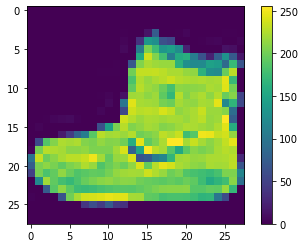

In [18]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

在將這些值饋送到神經網絡模型之前，將它們縮放到 0 到 1 的範圍。為此，將值除以 255。重要的是，*訓練集*和*測試集*以相同的方式進行預處理：

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

為了驗證數據格式是否正確並且您已準備好構建和訓練網絡，讓我們顯示*訓練集*中的前 25 張圖像，並在每張圖像下方顯示類名。

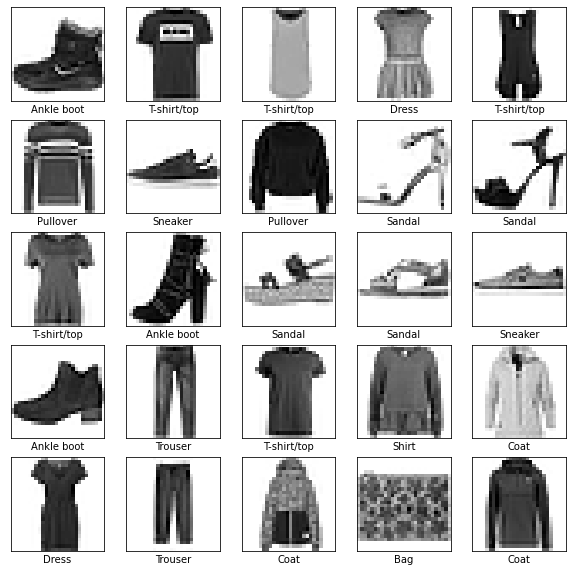

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## 建立模型

構建神經網絡需要配置模型的層，然後編譯模型。

### 設置圖層

神經網絡的基本構建塊是 [*layer*](https://www.tensorflow.org/api_docs/python/tf/keras/layers)。層從輸入的數據中提取表示。希望這些表示對手頭的問題有意義。

大多數深度學習包括將簡單的層鏈接在一起。大多數層，例如 `tf.keras.layers.Dense`，都有在訓練期間學習的參數。

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

該網絡的第一層“tf.keras.layers.Flatten”將圖像的格式從二維數組（28 x 28 像素）轉換為一維數組（28 * 28 = 784 像素） ）。將這一層視為圖像中的像素行拆開並將它們排列起來。該層沒有要學習的參數；它只會重新格式化數據。

像素被展平後，網絡由兩個 `tf.keras.layers.Dense` 層的序列組成。這些是密集連接或完全連接的神經層。第一個“密集”層有 128 個節點（或神經元）。第二層（也是最後一層）返回一個長度為 10 的 logits 數組。每個節點都包含一個分數，表示當前圖像屬於 10 個類別之一。

### 編譯模型

在模型準備好進行訓練之前，還需要進行一些設置。這些是在模型的 [*compile*](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) 步驟中添加的：

* [*損失函數*](https://www.tensorflow.org/api_docs/python/tf/keras/losses)——衡量模型在訓練期間的準確度。您希望最小化此功能以將模型“引導”到正確的方向。
* [*Optimizer*](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)——這是模型根據它看到的數據及其損失函數更新的方式。
* [*Metrics*](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) — 用於監控訓練和測試步驟。以下示例使用 *accuracy*，即正確分類的圖像比例。

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## 訓練模型

訓練神經網絡模型需要以下步驟：

1. 將訓練數據輸入模型。在此示例中，訓練數據位於 `train_images` 和 `train_labels` 數組中。
2. 模型學習關聯圖像和標籤。
3. 你要求模型對一個測試集進行預測——在這個例子中是`test_images`數組。
4. 驗證預測是否與 `test_labels` 數組中的標籤匹配。

### 餵模型

要開始訓練，請調用 [`model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) 方法——之所以這麼稱呼是因為它使模型“適合”訓練數據：

In [12]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 4.0244 - accuracy: 0.6938
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7262 - accuracy: 0.7551
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6544 - accuracy: 0.7714
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5820 - accuracy: 0.7937
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5715 - accuracy: 0.7993
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5556 - accuracy: 0.8113
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5334 - accuracy: 0.8170
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5298 - accuracy: 0.8215
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5095 - accuracy: 0.8292
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.499

在模型訓練時，會顯示損失和準確度指標。該模型在訓練數據上的準確率約為 0.91（或 91%）。

### 評估準確性

接下來，比較模型在測試數據集上的表現：

In [13]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.7998 - accuracy: 0.7736 - 791ms/epoch - 3ms/step

Test accuracy: 0.7735999822616577


事實證明，測試數據集的準確率略低於訓練數據集的準確率。訓練準確度和測試準確度之間的差距代表*過度擬合*。當機器學習模型在新的、以前看不見的輸入上的表現比在訓練數據上的表現更差時，就會發生過度擬合。過擬合模型會將訓練數據集中的噪聲和細節“記憶”到對模型在新數據上的性能產生負面影響的程度。有關詳細信息，請參閱以下內容：
*[演示過擬合](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#demonstrate_overfitting)
*[防止過擬合的策略](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#strategies_to_prevent_overfitting)

### 作出預測

通過訓練模型，您可以使用它來對某些圖像進行預測。
附加一個 softmax 層以將模型的線性輸出 -[logits](https://developers.google.com/machine-learning/glossary#logits) -轉換為概率，這應該更容易解釋。

In [14]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [15]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


在這裡，模型已經預測了測試集中每個圖像的標籤。我們來看看第一個預測：

In [16]:
predictions[0]

array([7.3355430e-16, 1.4297657e-26, 0.0000000e+00, 2.0877946e-25,
       0.0000000e+00, 5.4217774e-02, 1.1597254e-33, 4.7523413e-02,
       2.3857466e-10, 8.9825881e-01], dtype=float32)

預測是 10 個數字的數組。它們代表了模特對圖像對應 10 種不同服裝中的每一種的“信心”。您可以看到哪個標籤的置信度值最高：

In [17]:
np.argmax(predictions[0])

9

因此，模型最有信心這張圖片是腳踝靴，或“class_names[9]”。檢查測試標籤表明這個分類是正確的：

In [18]:
test_labels[0]

9

繪製此圖以查看完整的 10 個類別預測。

In [19]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### 驗證預測

通過訓練模型，您可以使用它來對某些圖像進行預測。

讓我們看一下第 0 張圖像、預測和預測數組。正確的預測標籤是藍色的，不正確的預測標籤是紅色的。該數字給出了預測標籤的百分比（總分 100）。

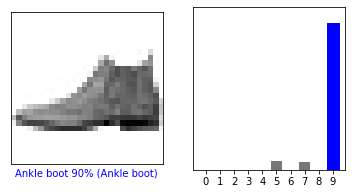

In [20]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

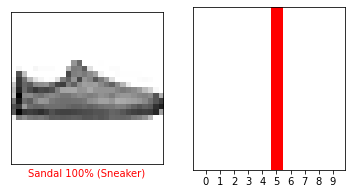

In [21]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

讓我們用他們的預測繪製幾張圖像。請注意，即使非常自信，模型也可能是錯誤的。

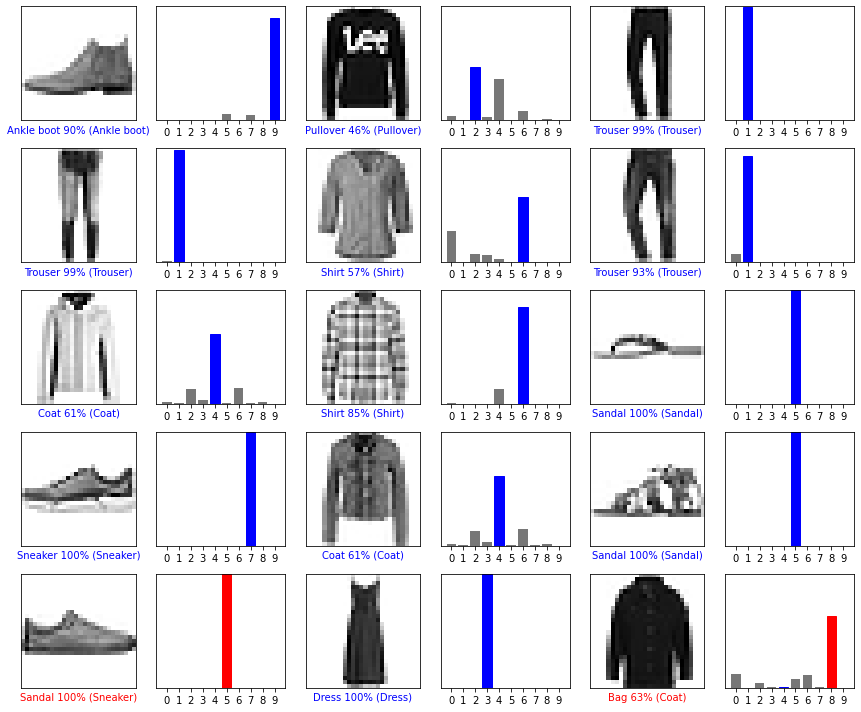

In [22]:
# 繪製前 X 個測試圖像、它們的預測標籤和真實標籤。
# 正確預測為藍色，錯誤預測為紅色。
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## 使用訓練好的模型

最後，使用經過訓練的模型對單個圖像進行預測。

In [23]:
# 從測試數據集中抓取一張圖片。
img = test_images[1]

print(img.shape)

(28, 28)


`tf.keras` 模型經過優化，可以一次對 *batch*或集合進行預測。因此，即使您使用的是單個圖像，也需要將其添加到列表中：

In [24]:
# 將圖像添加到它是唯一成員的批處理中。
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


現在預測該圖像的正確標籤：

In [25]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 37ms/step
[[4.1515026e-02 2.7235204e-03 4.6473679e-01 3.0260675e-02 3.6517182e-01
  1.3073432e-07 8.1541874e-02 2.3973670e-12 1.4050160e-02 8.7767550e-11]]


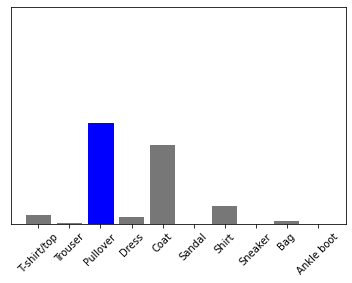

In [27]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

`tf.keras.Model.predict` 返回一個列表列表——數據批次中的每個圖像都有一個列表。在批處理中獲取我們（唯一）圖像的預測：

In [26]:
np.argmax(predictions_single[0])

2

並且模型按預期預測標籤。